In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/media/D/musor/reportsd.xls')

In [3]:
df.head()

,Номер,Ticket#,Возраст,Название,Дата создания,Время закрытия,Очередь,Состояние,ID клиента,Сервис,...,Источник,Причина отклонения,Оценка,Информационная система,Причина обращения,Имя Фамилия,Отдел/Отделение,Требуется выезд СА (уведомление директору),Текст обращения,TestText2
0,1,20231027100068,9 m,принтер,2023-10-27 10:35:12,NaN,Кызылординский филиал Техподдержка,in progress,KZF,10 ИТ-поддержка филиалов::10R_1 Поддержка Поль...,...,Email,NaN,NaN,NaN,NaN,Күнекей Ерлан,_Отделения,NaN,NaN,NaN
1,2,20231027100066,14 m,картридж,2023-10-27 10:30:11,NaN,Жамбылский филиал Техподдержка,in progress,TF,10 ИТ-поддержка филиалов::10R_1 Поддержка Поль...,...,Email,NaN,NaN,NaN,NaN,Ерасыл Сартай,_Отделения,NaN,NaN,NaN
2,3,20231027100061,17 m,"В кассе отд. Саумалколь начал ""зависать"" скане...",2023-10-27 10:27:54,NaN,Акмолинский филиал Техподдержка,in progress,KSHF,10 ИТ-поддержка филиалов::10R_1 Поддержка Поль...,...,Phone,NaN,NaN,NaN,NaN,Ольга Анналыева,_Отделения,NaN,NaN,NaN
3,4,20231027100059,24 m,Обновление до Win11 ПК видеонаблюдения с кабин...,2023-10-27 10:20:47,2023-10-27 10:21:19,Акмолинский филиал Техподдержка,closed,KSHF,10 ИТ-поддержка филиалов::10R_8 Прочее,...,Phone,NaN,NaN,NaN,NaN,Захар Ровенский,(32) Отдел информационных технологий,NaN,NaN,NaN
4,5,20231027100054,29 m,RE: проблема с нклайер,2023-10-27 10:15:26,NaN,Кызылординский филиал Техподдержка,in progress,KZF,10 ИТ-поддержка филиалов::10R_1 Поддержка Поль...,...,Email,NaN,NaN,NaN,NaN,Нурбол Бегманов,(41) Отдел по работе с проблемными кредитами,NaN,NaN,NaN


In [38]:
work = df[['Время закрытия','Агент (владелец)','Потраченное на заявку время']]

In [39]:
work = work[work['Агент (владелец)'].isin(['Александр Кириченко', 'Алибек Тухбаев', 'Нурлан Сагындык', 'Келімбет Қадырбек'])]
work = pd.DataFrame(work)

In [40]:
work.dropna(subset=['Время закрытия'], inplace=True)
work['Потраченное на заявку время'].fillna(0, inplace=True)

In [41]:
work['Время закрытия'] = pd.to_datetime(df['Время закрытия'], errors='coerce')

In [42]:
work = work[work['Время закрытия'].dt.month == 10]

In [43]:
df1 = pd.DataFrame(work['Агент (владелец)'].value_counts())
df2 = pd.DataFrame(work.groupby('Агент (владелец)')['Потраченное на заявку время'].sum() /60)
work2 = df1.join(df2)

In [45]:
work2

,count,Потраченное на заявку время
Агент (владелец),,
Александр Кириченко,116,130.616667
Нурлан Сагындык,53,36.583333
Алибек Тухбаев,41,69.566667
Келімбет Қадырбек,13,6.633333


<function matplotlib.pyplot.show(close=None, block=None)>

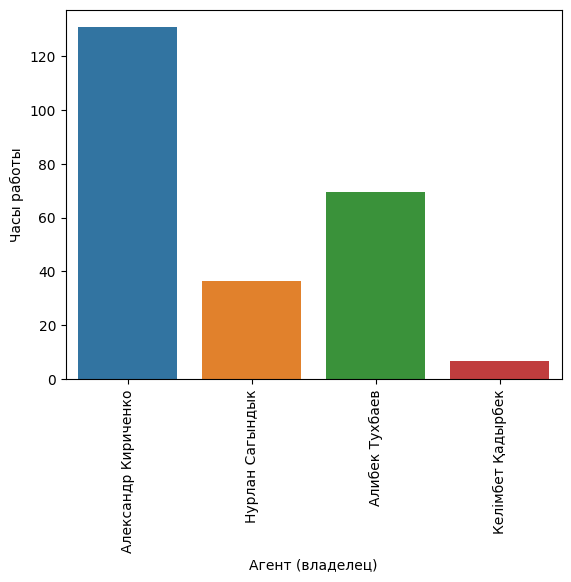

In [62]:
sns.barplot(x=work2.index, y='Потраченное на заявку время',data=work2)
plt.ylabel('Часы работы')
plt.xticks(rotation=90)
plt.show

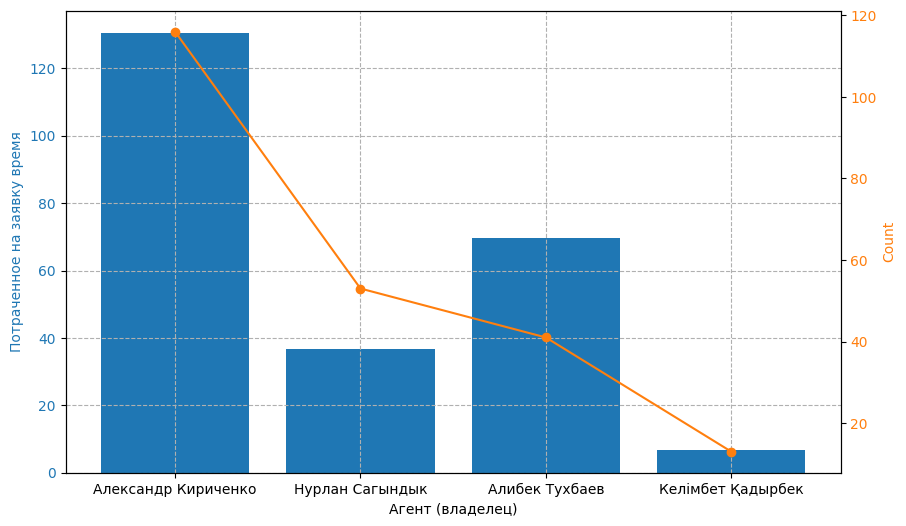

In [69]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Основная ось Y
ax1.set_xlabel('Агент (владелец)')
ax1.set_ylabel('Потраченное на заявку время', color='tab:blue')
ax1.bar(work2.index, work2['Потраченное на заявку время'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Дополнительная ось Y
ax2 = ax1.twinx()
ax2.set_ylabel('Count', color='tab:orange')
ax2.plot(work2.index, work2['count'], color='tab:orange', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Включаем сетку для обоих осей
ax1.grid(True, linestyle='--')

# Вращаем метки по оси X, чтобы они не перекрывались
plt.xticks(rotation=90)

# Отображаем график
plt.show()

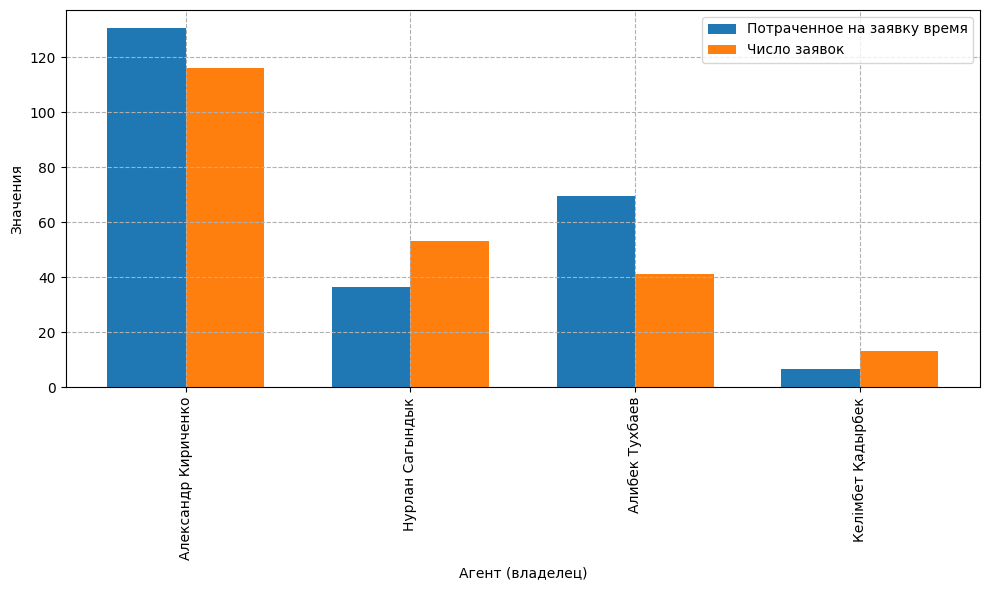

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(work2))
ax.bar(x, work2['Потраченное на заявку время'], width=bar_width, label='Потраченное на заявку время', color='tab:blue')
ax.bar([i + bar_width for i in x], work2['count'], width=bar_width, label='Число заявок', color='tab:orange')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(work2.index, rotation=90)
ax.legend()

# Задаем подписи для осей
ax.set_xlabel('Агент (владелец)')
ax.set_ylabel('Значения')

# Включаем сетку
ax.grid(True, linestyle='--')

# Отображаем график
plt.tight_layout()
plt.show()

